<a href="https://colab.research.google.com/github/LukeBirkett/football_analytics/blob/main/pass_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [195]:
pip install mplsoccer

In [196]:
import sqlite3
import sqlalchemy
import pandas as pd
import numpy as np

from matplotlib import rcParams
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch

from sklearn.cluster import KMeans

In [ ]:
con = sqlite3.connect("/content/gdrive/MyDrive/Colab Notebooks/invinciblesSeason/premSeason_03.sqlite")
#con.close()
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)


# Clustering Match_ID: 3749257

In [198]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 AND match_id = 3749257
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,fb4a55ce-39c1-4ce7-8669-4d3b3afd5407,3749257,33,1,2021-09-14 00:00:21.539,0,21,3,1.041432,"['80510e8f-b760-4180-b97c-7bea4d50052c', 'a072...",1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,13,Right Center Midfield,56.0,30.9,Dennis Bergkamp,15042.0,None,NaN,None,None,67.5,36.7,12.879829,0.467120,Ground Pass
1,db1f213b-af41-4329-9859-88654d41447b,3749257,39,1,2021-09-14 00:00:26.999,0,26,3,1.626795,"['139ce5e3-a285-4dac-a1f5-e850135305f5', '266a...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,91.9,50.5,Fredrik Ljungberg,15754.0,None,NaN,None,None,95.9,71.7,21.574059,1.384309,Ground Pass
2,23c8ba4d-045d-45b7-9fcd-246ccbad8968,3749257,43,1,2021-09-14 00:00:30.510,0,30,3,0.863954,"['83612c53-ff14-47a8-b436-21665996cda8', 'ddb7...",1,Arsenal,1,Arsenal,1,Regular Play,15754,Fredrik Ljungberg,12,Right Midfield,92.1,74.3,Laureano Bisan-Etame Mayer,40222.0,None,NaN,None,None,79.0,74.0,13.103435,-3.118696,Ground Pass
3,3b06248c-b38a-4880-9a7d-d468f678420e,3749257,46,1,2021-09-14 00:00:32.957,0,32,3,0.920079,['d945e713-2764-4be3-808c-3b5ce8834305'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,81.0,71.7,Dennis Bergkamp,15042.0,None,NaN,None,None,91.9,64.3,13.174597,-0.596423,Ground Pass
4,8968d056-ba06-42a4-9269-5f2a75946699,3749257,49,1,2021-09-14 00:00:33.877,0,33,3,0.857373,"['1863fbaa-dddb-4615-a988-d92e0586698d', '2e4c...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,92.1,64.3,Fredrik Ljungberg,15754.0,None,NaN,None,None,90.7,74.0,9.800510,1.714136,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,f31852e9-b2a6-4e7d-baef-e2e7061c083a,3749257,3440,2,2021-09-14 00:46:25.426,91,25,185,0.677362,['825b69e6-9fbc-4df8-9e87-6c98883cd892'],1,Arsenal,1,Arsenal,1,Regular Play,40221,Gilberto Aparecido da Silva,15,Left Center Midfield,65.3,41.1,Kolo Habib Touré,38412.0,None,NaN,None,None,58.3,47.4,9.417537,2.408777,Ground Pass
566,6f9cf108-aea1-4997-ac4b-f100e1f8dd86,3749257,3443,2,2021-09-14 00:46:26.713,91,26,185,0.848100,['efa789d8-2a9b-4507-81ff-6fe933e2f7d4'],1,Arsenal,1,Arsenal,1,Regular Play,38412,Kolo Habib Touré,3,Right Center Back,58.3,47.4,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,65.7,46.3,7.481310,-0.147568,Ground Pass
567,178bc03b-0351-4b8d-9fd9-74eaac2cb278,3749257,3445,2,2021-09-14 00:46:27.561,91,27,185,2.327190,['f0690c0e-a22b-4ad6-a73b-8b850a63cace'],1,Arsenal,1,Arsenal,1,Regular Play,40221,Gilberto Aparecido da Silva,15,Left Center Midfield,65.7,46.3,Thierry Henry,15516.0,None,NaN,None,None,63.3,69.4,23.224340,1.674321,Ground Pass
568,221d3d40-31ed-41b2-8d3a-3dd161698759,3749257,3448,2,2021-09-14 00:46:32.690,91,32,185,3.479819,['500fa54c-4da0-42aa-a069-f0570b562dfe'],1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,24,Left Center Forward,59.0,70.0,Jens Lehmann,20015.0,None,NaN,None,None,16.8,55.2,44.720016,-2.804285,Low Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [199]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 20,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [ ]:
dfPassTemp.head()

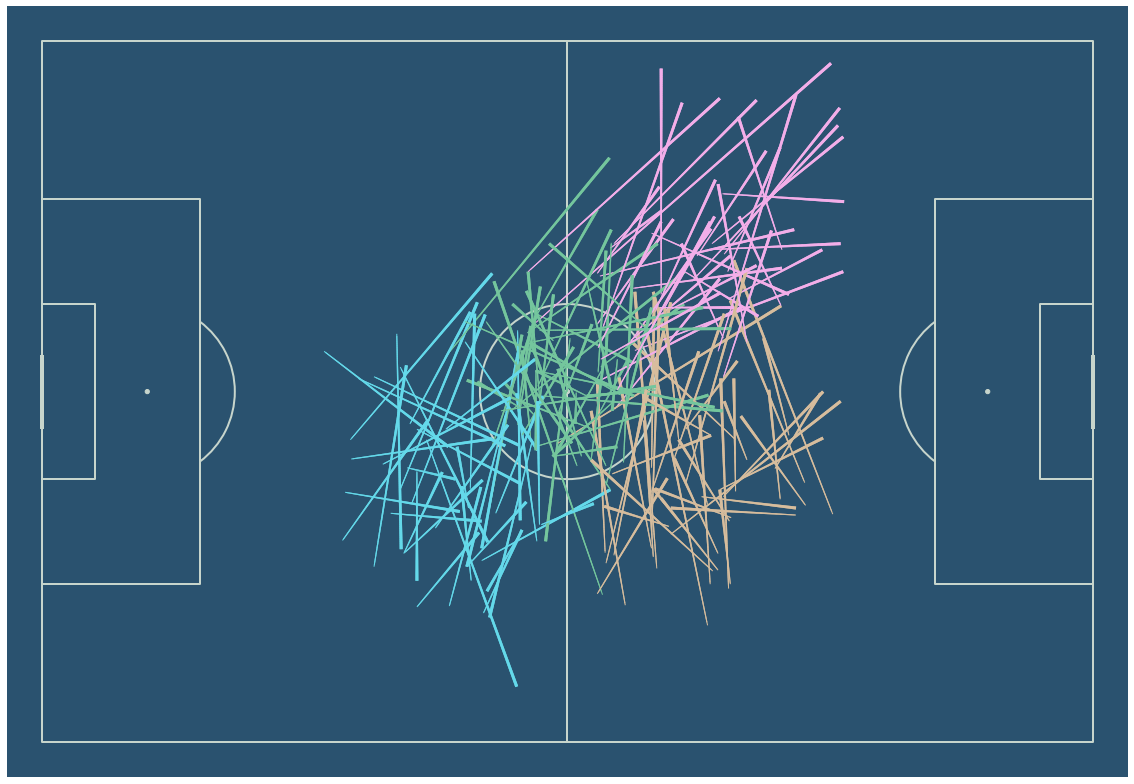

In [201]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Player_name: Ashley Cole

In [202]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 and player_name = 'Ashley Cole'
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,4bc824e4-6cf9-48ec-919a-1c8a164296a7,3749257,95,1,2021-09-14 00:01:33.065,1,33,6,1.217789,['c23c9201-2b39-4335-9907-143798a6f344'],1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,27.1,7.4,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,25.5,22.7,15.383432,1.674993,Ground Pass
1,d07aa868-52f9-4e41-b7eb-f437b547d7a2,3749257,135,1,2021-09-14 00:02:49.566,2,49,9,0.980791,['1dbdb6e1-5120-40b9-ac4e-3052fef7d162'],1,Arsenal,1,Arsenal,4,From Throw In,12529,Ashley Cole,6,Left Back,13.0,0.1,Robert Pirès,19312.0,Throw-in,67.0,None,None,16.5,5.8,6.688796,1.020121,High Pass
2,b0eff6b0-803e-43e4-a153-a6bbce4c676a,3749257,141,1,2021-09-14 00:02:52.141,2,52,9,0.558652,"['44f15595-5a3b-4811-ac9a-fb59d7b52d1f', '75e4...",1,Arsenal,1,Arsenal,4,From Throw In,12529,Ashley Cole,6,Left Back,13.3,2.5,Robert Pirès,19312.0,None,NaN,None,None,14.7,9.0,6.649060,1.358653,Ground Pass
3,671c610f-fd7e-4116-bf6f-73bd8cd989aa,3749257,203,1,2021-09-14 00:04:42.441,4,42,13,0.930759,"['179bce2d-5503-45d3-8484-887b14302124', '6fdc...",1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,61.9,8.3,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,63.4,20.6,12.391126,1.449444,Ground Pass
4,4c95a918-938b-494c-b39b-5b21f4498f9e,3749257,240,1,2021-09-14 00:05:26.836,5,26,13,1.096276,['b6fe4811-abf3-4b7a-b04f-e33cf53ccd59'],1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,95.4,11.6,Dennis Bergkamp,15042.0,None,NaN,None,None,84.3,23.8,16.493938,2.309019,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,1b24b650-8c0c-43d6-9817-be61a2302a6e,3749431,2995,2,2021-09-14 00:37:52.885,82,52,188,0.570067,"['6c1b49fd-787e-45a3-8af2-69c919876eb2', '934f...",1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,45.6,26.6,Gilberto Aparecido da Silva,40221.0,Recovery,66.0,None,None,50.6,31.1,6.726812,0.732815,Low Pass
1323,2ea2e2ef-0cb5-45b3-98a9-e28f62a1a44e,3749431,3005,2,2021-09-14 00:38:16.131,83,16,189,2.125776,['30f2bbba-1170-4926-aaca-fc450888f660'],1,Arsenal,1,Arsenal,4,From Throw In,12529,Ashley Cole,6,Left Back,75.3,0.1,Dennis Bergkamp,15042.0,Throw-in,67.0,None,None,86.8,3.2,11.910500,0.263307,Low Pass
1324,f5e7a7b5-a4f0-4041-8e36-6c8720d77e01,3749431,3124,2,2021-09-14 00:41:13.078,86,13,195,1.237994,['9f401ce5-20d9-4eaa-9ec8-db50604f462c'],1,Arsenal,1,Arsenal,8,From Keeper,12529,Ashley Cole,6,Left Back,47.9,4.7,Eduardo César Daude Gaspar,26014.0,None,NaN,None,None,62.6,17.1,19.231485,0.700730,Ground Pass
1325,16f33e37-e12b-42db-8e1d-f719bba2099e,3749431,3165,2,2021-09-14 00:43:04.179,88,4,198,1.266248,"['3e49e6b6-bfc8-415b-856c-8a96fdea2618', 'e98e...",1,Arsenal,1,Arsenal,3,From Free Kick,12529,Ashley Cole,6,Left Back,38.7,13.3,Eduardo César Daude Gaspar,26014.0,Recovery,66.0,None,None,47.9,1.5,14.962620,-0.908581,Low Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [203]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 30,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [204]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,4bc824e4-6cf9-48ec-919a-1c8a164296a7,3749257,95,1,2021-09-14 00:01:33.065,1,33,6,1.217789,['c23c9201-2b39-4335-9907-143798a6f344'],1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,27.1,7.4,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,25.5,22.7,15.383432,1.674993,Ground Pass,10
1,d07aa868-52f9-4e41-b7eb-f437b547d7a2,3749257,135,1,2021-09-14 00:02:49.566,2,49,9,0.980791,['1dbdb6e1-5120-40b9-ac4e-3052fef7d162'],1,Arsenal,1,Arsenal,4,From Throw In,12529,Ashley Cole,6,Left Back,13.0,0.1,Robert Pirès,19312.0,Throw-in,67.0,None,None,16.5,5.8,6.688796,1.020121,High Pass,21
2,b0eff6b0-803e-43e4-a153-a6bbce4c676a,3749257,141,1,2021-09-14 00:02:52.141,2,52,9,0.558652,"['44f15595-5a3b-4811-ac9a-fb59d7b52d1f', '75e4...",1,Arsenal,1,Arsenal,4,From Throw In,12529,Ashley Cole,6,Left Back,13.3,2.5,Robert Pirès,19312.0,None,NaN,None,None,14.7,9.0,6.649060,1.358653,Ground Pass,21
3,671c610f-fd7e-4116-bf6f-73bd8cd989aa,3749257,203,1,2021-09-14 00:04:42.441,4,42,13,0.930759,"['179bce2d-5503-45d3-8484-887b14302124', '6fdc...",1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,61.9,8.3,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,63.4,20.6,12.391126,1.449444,Ground Pass,5
4,4c95a918-938b-494c-b39b-5b21f4498f9e,3749257,240,1,2021-09-14 00:05:26.836,5,26,13,1.096276,['b6fe4811-abf3-4b7a-b04f-e33cf53ccd59'],1,Arsenal,1,Arsenal,1,Regular Play,12529,Ashley Cole,6,Left Back,95.4,11.6,Dennis Bergkamp,15042.0,None,NaN,None,None,84.3,23.8,16.493938,2.309019,Ground Pass,22


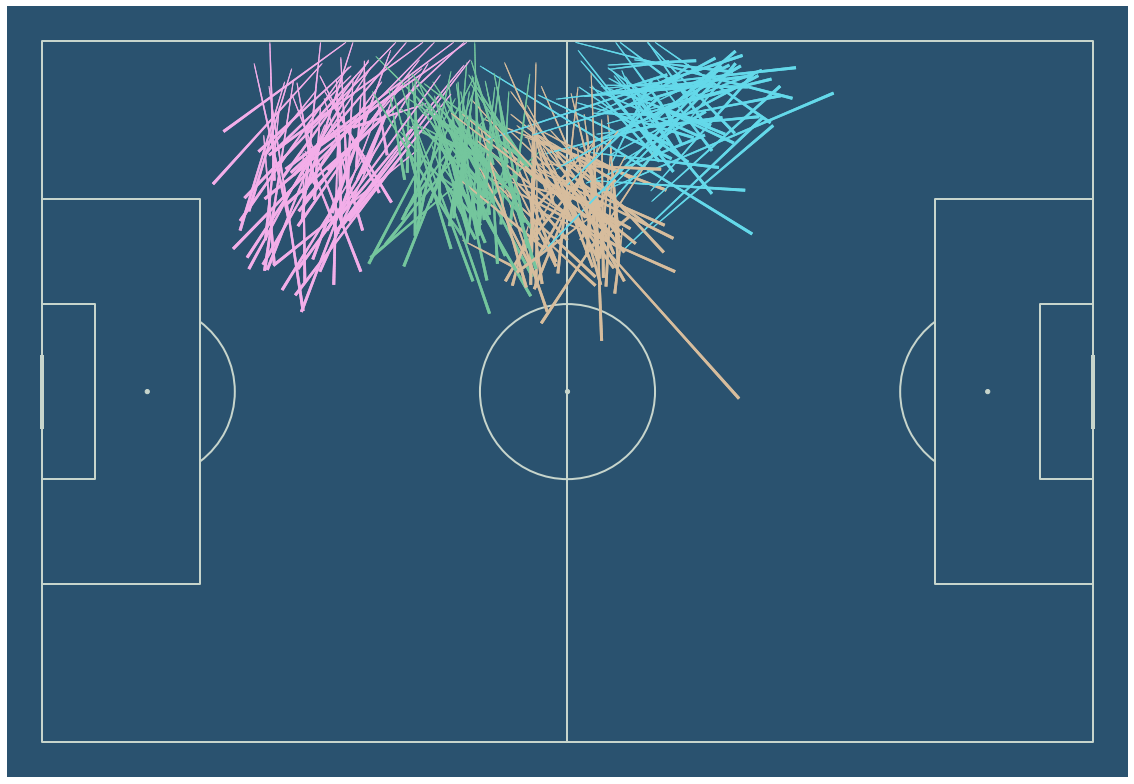

In [205]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Player_name: Laureano Bisan-Etame Mayer

In [206]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 and player_name = 'Laureano Bisan-Etame Mayer'
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,3b06248c-b38a-4880-9a7d-d468f678420e,3749257,46,1,2021-09-14 00:00:32.957,0,32,3,0.920079,['d945e713-2764-4be3-808c-3b5ce8834305'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,81.0,71.7,Dennis Bergkamp,15042.0,None,NaN,None,None,91.9,64.3,13.174597,-0.596423,Ground Pass
1,7127df49-8c77-495a-88f1-bc54f1b0e0a2,3749257,54,1,2021-09-14 00:00:58.915,0,58,4,1.761147,['2fe89ff6-5c3c-43c8-b7f4-6e30a073f80b'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,95.9,80.0,Gilberto Aparecido da Silva,40221.0,Throw-in,67.0,None,None,79.2,73.1,18.069311,-2.749782,Low Pass
2,36eb2feb-040b-4125-bf2e-9f86d4795cc2,3749257,65,1,2021-09-14 00:01:06.020,1,6,4,2.491436,"['55abe6e4-b630-46f1-8556-bc4a55766cad', 'bd97...",1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,77.2,75.2,Kolo Habib Touré,38412.0,Recovery,66.0,None,None,54.8,72.5,22.562136,-3.021635,Ground Pass
3,c1f7cdb4-c408-4fd3-a939-b8961aa6ed08,3749257,154,1,2021-09-14 00:03:09.281,3,9,9,1.735352,['cb9f2aa9-ed1b-4150-8f0c-382862afe2b9'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,86.8,71.3,Patrick Vieira,15515.0,None,NaN,None,None,76.3,62.0,14.026403,-2.416727,Ground Pass
4,d8b2db3e-cf9e-4bde-9e89-061b8cadad1c,3749257,231,1,2021-09-14 00:05:16.691,5,16,13,1.029156,['f428064d-9638-41d6-899d-4abdd4f45c96'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,42.8,64.6,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,49.9,56.1,11.075197,-0.874902,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,59cc889d-9bbe-4706-9924-d3b2fcbf4c5d,3749431,2842,2,2021-09-14 00:34:35.137,79,35,178,1.534342,"['b9f16c7e-cf62-45d4-b97b-f5c85b6c88c5', 'd275...",1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,21.4,71.2,Kolo Habib Touré,38412.0,Recovery,66.0,None,None,20.0,66.8,4.617359,-1.878849,High Pass
1401,51962fb7-375f-4cf4-8078-37ee96b1446a,3749431,2949,2,2021-09-14 00:36:39.176,81,39,184,1.307587,['56791558-0903-476a-8f5a-48af7cee44d0'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,94.3,80.0,Robert Pirès,19312.0,Throw-in,67.0,None,None,91.7,66.8,13.453624,-1.765276,Low Pass
1402,5eea4ba9-a312-422a-aea3-6f965434650e,3749431,3020,2,2021-09-14 00:38:29.686,83,29,189,1.235806,"['b2a78290-a7b5-48ca-83ad-81a0526f871f', 'b712...",1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,56.0,70.6,Robert Pirès,19312.0,None,NaN,None,None,72.5,73.5,16.752910,0.173981,Ground Pass
1403,19be75c2-351b-4726-9b5e-0ed1fbb43fb6,3749431,3038,2,2021-09-14 00:38:49.702,83,49,192,3.787001,['02433c0f-1b84-4a6e-af1f-2989ba6d2fc3'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,50.8,80.0,Kolo Habib Touré,38412.0,Throw-in,67.0,None,None,27.7,58.3,31.693848,-2.387434,Low Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [207]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 30,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [208]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,3b06248c-b38a-4880-9a7d-d468f678420e,3749257,46,1,2021-09-14 00:00:32.957,0,32,3,0.920079,['d945e713-2764-4be3-808c-3b5ce8834305'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,81.0,71.7,Dennis Bergkamp,15042.0,None,NaN,None,None,91.9,64.3,13.174597,-0.596423,Ground Pass,2
1,7127df49-8c77-495a-88f1-bc54f1b0e0a2,3749257,54,1,2021-09-14 00:00:58.915,0,58,4,1.761147,['2fe89ff6-5c3c-43c8-b7f4-6e30a073f80b'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,95.9,80.0,Gilberto Aparecido da Silva,40221.0,Throw-in,67.0,None,None,79.2,73.1,18.069311,-2.749782,Low Pass,3
2,36eb2feb-040b-4125-bf2e-9f86d4795cc2,3749257,65,1,2021-09-14 00:01:06.020,1,6,4,2.491436,"['55abe6e4-b630-46f1-8556-bc4a55766cad', 'bd97...",1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,77.2,75.2,Kolo Habib Touré,38412.0,Recovery,66.0,None,None,54.8,72.5,22.562136,-3.021635,Ground Pass,29
3,c1f7cdb4-c408-4fd3-a939-b8961aa6ed08,3749257,154,1,2021-09-14 00:03:09.281,3,9,9,1.735352,['cb9f2aa9-ed1b-4150-8f0c-382862afe2b9'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,86.8,71.3,Patrick Vieira,15515.0,None,NaN,None,None,76.3,62.0,14.026403,-2.416727,Ground Pass,19
4,d8b2db3e-cf9e-4bde-9e89-061b8cadad1c,3749257,231,1,2021-09-14 00:05:16.691,5,16,13,1.029156,['f428064d-9638-41d6-899d-4abdd4f45c96'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,42.8,64.6,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,49.9,56.1,11.075197,-0.874902,Ground Pass,7


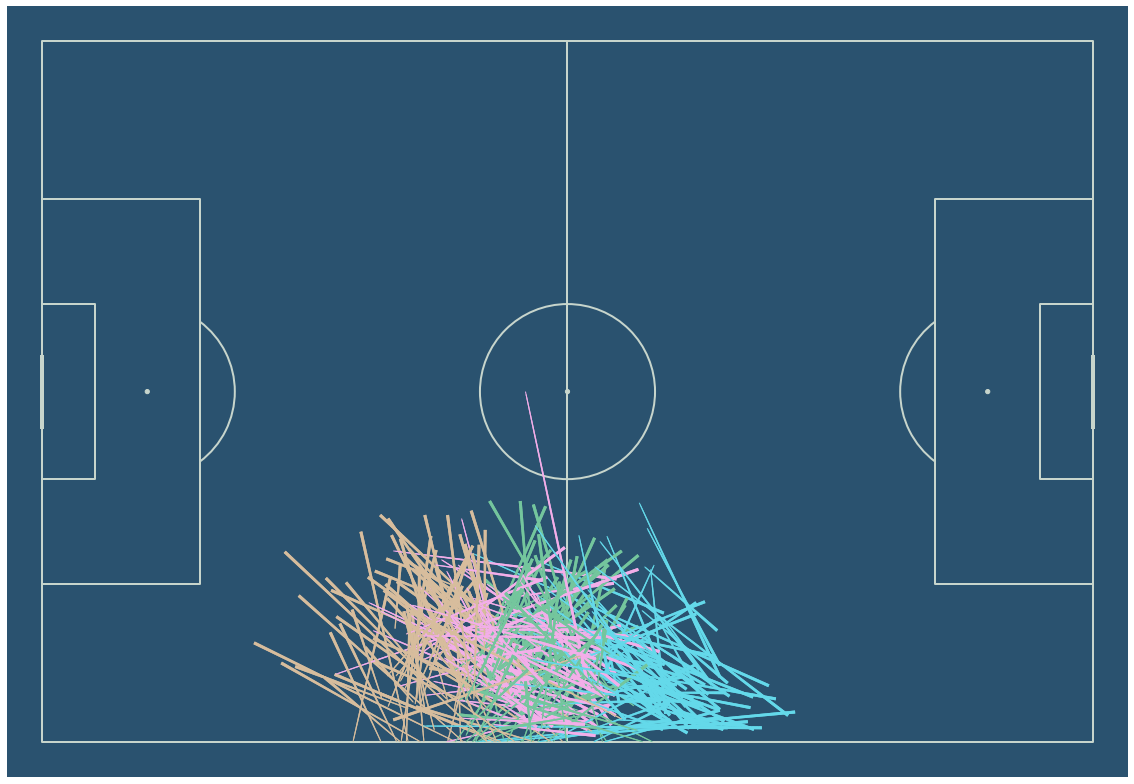

In [209]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Player_name: Dennis Bergkamp

In [210]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 and player_name = 'Dennis Bergkamp'
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,db1f213b-af41-4329-9859-88654d41447b,3749257,39,1,2021-09-14 00:00:26.999,0,26,3,1.626795,"['139ce5e3-a285-4dac-a1f5-e850135305f5', '266a...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,91.9,50.5,Fredrik Ljungberg,15754.0,None,NaN,None,None,95.9,71.7,21.574059,1.384309,Ground Pass
1,8968d056-ba06-42a4-9269-5f2a75946699,3749257,49,1,2021-09-14 00:00:33.877,0,33,3,0.857373,"['1863fbaa-dddb-4615-a988-d92e0586698d', '2e4c...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,92.1,64.3,Fredrik Ljungberg,15754.0,None,NaN,None,None,90.7,74.0,9.800510,1.714136,Ground Pass
2,74875bb2-02c7-4e03-8464-1a4c4ee59c7d,3749257,336,1,2021-09-14 00:07:18.153,7,18,16,1.097856,['f82cad6e-2122-426e-b6b8-9de7dd635e55'],1,Arsenal,1,Arsenal,4,From Throw In,15042,Dennis Bergkamp,22,Right Center Forward,97.4,39.7,Thierry Henry,15516.0,None,NaN,None,None,84.8,22.4,21.402103,-2.200280,Low Pass
3,3c269ea7-42a9-4e17-8f88-28b8331b6e03,3749257,373,1,2021-09-14 00:08:10.241,8,10,18,1.330563,"['d057bf6e-9815-4c1d-b3c3-6e4a7dfe57dd', 'f393...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,91.9,23.3,Fredrik Ljungberg,15754.0,None,NaN,None,None,97.7,46.8,24.205164,1.328824,Ground Pass
4,33a2673f-f286-487a-91b1-5d9a5087fc2c,3749257,424,1,2021-09-14 00:09:37.838,9,37,20,1.112255,['790440bd-6440-4ac8-8fd0-3e9357344b25'],1,Arsenal,1,Arsenal,4,From Throw In,15042,Dennis Bergkamp,22,Right Center Forward,94.5,53.8,Laureano Bisan-Etame Mayer,40222.0,None,NaN,None,None,95.9,73.4,19.649937,1.499489,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,f3c840e9-cb32-4f72-a074-9778a4262970,3749052,1269,1,2021-09-14 00:38:03.232,38,3,84,1.595073,"['24c69bde-32a1-4fb7-93bf-34539fd654e0', '6a24...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,64.4,41.5,Patrick Vieira,15515.0,None,NaN,None,None,80.0,9.8,35.330580,-1.113478,Ground Pass
630,5cd431ac-123b-46b6-a04e-cc2efd6ca37f,3749052,1763,2,2021-09-14 00:04:25.831,49,25,119,0.629013,['5a9c1954-a9ca-42bd-8281-37a3ec9fdae4'],1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,52.1,43.1,Eduardo César Daude Gaspar,26014.0,None,NaN,None,None,44.3,37.1,9.840732,-2.485897,Ground Pass
631,3b8fc56d-98c8-4002-b1e8-647f66d52556,3749052,1915,2,2021-09-14 00:08:20.864,53,20,126,2.364948,['1c9638af-550f-4830-a6c6-64152bd10712'],1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,112.4,78.1,Robert Pirès,19312.0,None,NaN,None,None,100.8,42.5,37.442223,-1.885790,High Pass
632,dba564c9-89c3-4474-88f3-f25e0fbd8467,3749431,2928,2,2021-09-14 00:36:05.766,81,5,183,0.897145,['8cfbd1b0-d878-4636-9e5f-2eab79eec8bf'],1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,24,Left Center Forward,84.0,37.5,Thierry Henry,15516.0,None,NaN,None,None,90.0,48.1,12.180312,1.055724,Ground Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [211]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 30,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [212]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,db1f213b-af41-4329-9859-88654d41447b,3749257,39,1,2021-09-14 00:00:26.999,0,26,3,1.626795,"['139ce5e3-a285-4dac-a1f5-e850135305f5', '266a...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,91.9,50.5,Fredrik Ljungberg,15754.0,None,NaN,None,None,95.9,71.7,21.574059,1.384309,Ground Pass,27
1,8968d056-ba06-42a4-9269-5f2a75946699,3749257,49,1,2021-09-14 00:00:33.877,0,33,3,0.857373,"['1863fbaa-dddb-4615-a988-d92e0586698d', '2e4c...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,92.1,64.3,Fredrik Ljungberg,15754.0,None,NaN,None,None,90.7,74.0,9.800510,1.714136,Ground Pass,27
2,74875bb2-02c7-4e03-8464-1a4c4ee59c7d,3749257,336,1,2021-09-14 00:07:18.153,7,18,16,1.097856,['f82cad6e-2122-426e-b6b8-9de7dd635e55'],1,Arsenal,1,Arsenal,4,From Throw In,15042,Dennis Bergkamp,22,Right Center Forward,97.4,39.7,Thierry Henry,15516.0,None,NaN,None,None,84.8,22.4,21.402103,-2.200280,Low Pass,0
3,3c269ea7-42a9-4e17-8f88-28b8331b6e03,3749257,373,1,2021-09-14 00:08:10.241,8,10,18,1.330563,"['d057bf6e-9815-4c1d-b3c3-6e4a7dfe57dd', 'f393...",1,Arsenal,1,Arsenal,1,Regular Play,15042,Dennis Bergkamp,22,Right Center Forward,91.9,23.3,Fredrik Ljungberg,15754.0,None,NaN,None,None,97.7,46.8,24.205164,1.328824,Ground Pass,11
4,33a2673f-f286-487a-91b1-5d9a5087fc2c,3749257,424,1,2021-09-14 00:09:37.838,9,37,20,1.112255,['790440bd-6440-4ac8-8fd0-3e9357344b25'],1,Arsenal,1,Arsenal,4,From Throw In,15042,Dennis Bergkamp,22,Right Center Forward,94.5,53.8,Laureano Bisan-Etame Mayer,40222.0,None,NaN,None,None,95.9,73.4,19.649937,1.499489,Ground Pass,27


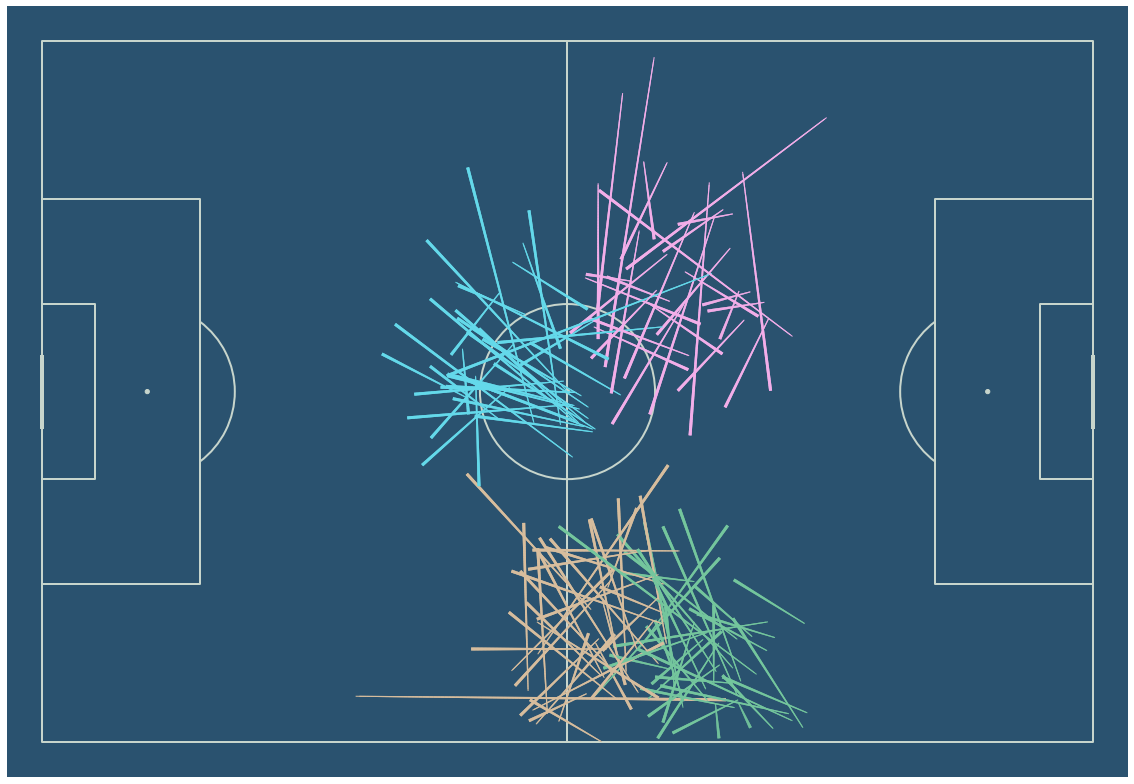

In [213]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Player_name: Thierry Henry

In [214]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 and player_name = 'Thierry Henry'
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,24932451-ea80-46f2-9166-bf53c4d8b53c,3749257,145,1,2021-09-14 00:02:58.597,2,58,9,1.418394,['6b6ab6b6-ea6a-4433-8cf4-57b2d092ce67'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,58.4,34.2,Robert Pirès,19312.0,None,NaN,None,None,53.7,30.0,6.303174,-2.412315,Low Pass
1,51c0b28f-bbe3-4b97-bafb-e0beb7e555e0,3749257,215,1,2021-09-14 00:04:57.470,4,57,13,1.211902,['db1ffc61-79fc-4527-b88e-8a544e10f441'],1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,24,Left Center Forward,76.0,52.9,Patrick Vieira,15515.0,None,NaN,None,None,69.8,28.6,25.078476,-1.820610,Ground Pass
2,5910a069-7902-4ae3-914c-a696544f9b31,3749257,328,1,2021-09-14 00:07:11.516,7,11,16,1.408892,['07535e71-0c8a-476c-9d7a-05c19e6ea1db'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,84.5,23.8,Robert Pirès,19312.0,None,NaN,None,None,79.5,8.6,16.001250,-1.888594,Low Pass
3,079a880b-3dc9-4993-ae3a-4287b4d08926,3749257,354,1,2021-09-14 00:07:57.338,7,57,18,1.232750,['e3ee5eca-3ff1-4a3f-9547-570d6ca9c390'],1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,24,Left Center Forward,64.9,51.2,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,59.0,42.3,10.678015,-2.156202,Ground Pass
4,8fad8135-d96e-4f25-af28-3af1ae2d9093,3749257,439,1,2021-09-14 00:09:53.623,9,53,20,1.158179,['97daea32-ddfb-4a6b-9e75-59b5eca9ca39'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,99.1,12.1,Patrick Vieira,15515.0,None,NaN,None,None,91.2,23.6,13.952061,2.172715,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,06595543-5119-47d5-9ea8-854a50798141,3749431,2620,2,2021-09-14 00:28:10.946,73,10,164,3.449111,"['99f1e7b5-74c0-48d8-bd0b-4291d7677c46', 'c547...",37,Newcastle United,1,Arsenal,4,From Throw In,15516,Thierry Henry,22,Right Center Forward,54.6,43.8,José Antonio Reyes Calderón,23816.0,Recovery,66.0,None,None,71.0,77.0,37.029716,1.111980,High Pass
751,f1c4b255-5608-405b-b7cc-148a0788b597,3749431,2738,2,2021-09-14 00:30:38.176,75,38,170,1.502730,"['1c96a2d3-65e9-43bc-b2b2-3d9cac053935', '9b7e...",1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,22,Right Center Forward,106.2,65.7,José Antonio Reyes Calderón,23816.0,None,NaN,None,None,111.6,34.6,31.565329,-1.398877,High Pass
752,5ffebccd-2c87-4c09-ac80-be52c9e8bd40,3749431,2804,2,2021-09-14 00:32:07.320,77,7,176,2.439500,"['f5628a86-b1de-4b5b-a787-f45f138228fb', 'f8cd...",1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,22,Right Center Forward,47.1,27.1,Patrick Vieira,15515.0,Interception,64.0,None,None,43.1,38.1,11.704700,1.919567,High Pass
753,42d6493f-86e3-4502-94df-2e388d4f278a,3749431,2937,2,2021-09-14 00:36:10.955,81,10,183,3.398105,"['8dbc7f18-d783-4685-9bd2-9be214760f01', 'd8f9...",1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,22,Right Center Forward,92.0,34.6,Eduardo César Daude Gaspar,26014.0,None,NaN,None,None,107.9,4.1,34.395638,-1.090245,Low Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [215]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 30,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [216]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,24932451-ea80-46f2-9166-bf53c4d8b53c,3749257,145,1,2021-09-14 00:02:58.597,2,58,9,1.418394,['6b6ab6b6-ea6a-4433-8cf4-57b2d092ce67'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,58.4,34.2,Robert Pirès,19312.0,None,NaN,None,None,53.7,30.0,6.303174,-2.412315,Low Pass,8
1,51c0b28f-bbe3-4b97-bafb-e0beb7e555e0,3749257,215,1,2021-09-14 00:04:57.470,4,57,13,1.211902,['db1ffc61-79fc-4527-b88e-8a544e10f441'],1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,24,Left Center Forward,76.0,52.9,Patrick Vieira,15515.0,None,NaN,None,None,69.8,28.6,25.078476,-1.820610,Ground Pass,27
2,5910a069-7902-4ae3-914c-a696544f9b31,3749257,328,1,2021-09-14 00:07:11.516,7,11,16,1.408892,['07535e71-0c8a-476c-9d7a-05c19e6ea1db'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,84.5,23.8,Robert Pirès,19312.0,None,NaN,None,None,79.5,8.6,16.001250,-1.888594,Low Pass,0
3,079a880b-3dc9-4993-ae3a-4287b4d08926,3749257,354,1,2021-09-14 00:07:57.338,7,57,18,1.232750,['e3ee5eca-3ff1-4a3f-9547-570d6ca9c390'],1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,24,Left Center Forward,64.9,51.2,Gilberto Aparecido da Silva,40221.0,None,NaN,None,None,59.0,42.3,10.678015,-2.156202,Ground Pass,25
4,8fad8135-d96e-4f25-af28-3af1ae2d9093,3749257,439,1,2021-09-14 00:09:53.623,9,53,20,1.158179,['97daea32-ddfb-4a6b-9e75-59b5eca9ca39'],1,Arsenal,1,Arsenal,4,From Throw In,15516,Thierry Henry,24,Left Center Forward,99.1,12.1,Patrick Vieira,15515.0,None,NaN,None,None,91.2,23.6,13.952061,2.172715,Ground Pass,29


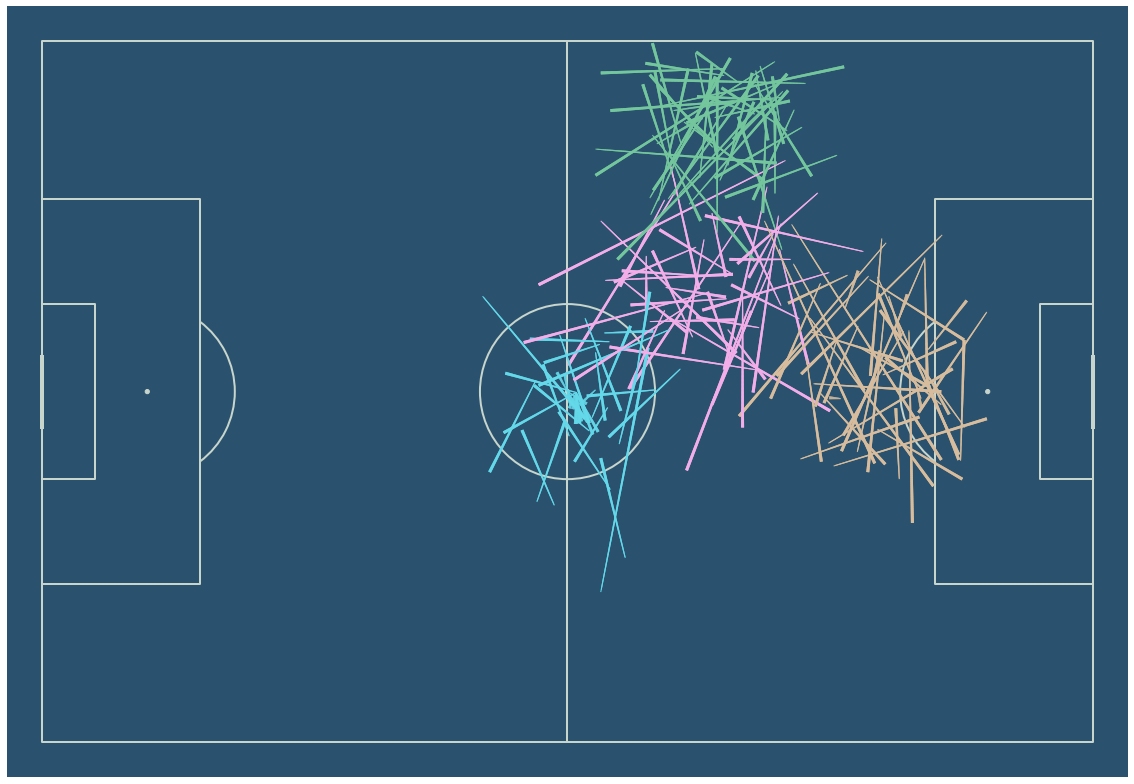

In [217]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Progressive Passes

In [218]:
sql = f'''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE team_name = 'Arsenal'
 AND pass_outcome_name is null
 AND (x_end_location - x) > 10
 and x > 65
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,3b06248c-b38a-4880-9a7d-d468f678420e,3749257,46,1,2021-09-14 00:00:32.957,0,32,3,0.920079,['d945e713-2764-4be3-808c-3b5ce8834305'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,81.0,71.7,Dennis Bergkamp,15042.0,None,NaN,None,None,91.9,64.3,13.174597,-0.596423,Ground Pass
1,d96a0b8c-a5cf-40a8-be5d-2071033ecc44,3749257,189,1,2021-09-14 00:04:31.971,4,31,11,0.639869,['38d2fba0-1efb-40e6-9aae-97909ac1f886'],1,Arsenal,1,Arsenal,3,From Free Kick,15515,Patrick Vieira,13,Right Center Midfield,67.5,28.2,Dennis Bergkamp,15042.0,None,NaN,None,None,84.5,25.9,17.154882,-0.134478,Ground Pass
2,3d2f1d0f-b54a-46d0-ac0f-3c9991b4a864,3749257,218,1,2021-09-14 00:05:01.809,5,1,13,0.891193,['bbc301da-7a31-4eca-ae57-394cc3b48951'],1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,13,Right Center Midfield,76.5,23.1,Dennis Bergkamp,15042.0,None,NaN,None,None,91.5,10.9,19.334942,-0.682818,Ground Pass
3,d0cee74b-6081-4628-9e6b-71050a575dbe,3749257,325,1,2021-09-14 00:07:09.650,7,9,16,0.909242,['3bf49865-e5d5-4271-b9c3-40492cbd6911'],1,Arsenal,1,Arsenal,4,From Throw In,15637,"Sulzeer Jeremiah ""Sol"" Campbell",5,Left Center Back,67.7,35.3,Thierry Henry,15516.0,None,NaN,None,None,91.5,26.3,25.444841,-0.361531,Low Pass
4,1becd137-3c4d-42b5-b9b1-ba6499f819f9,3749257,334,1,2021-09-14 00:07:17.304,7,17,16,0.849196,['7a961e69-cdee-4e82-b08f-fdd3b27ee293'],1,Arsenal,1,Arsenal,4,From Throw In,15515,Patrick Vieira,13,Right Center Midfield,84.5,32.3,Dennis Bergkamp,15042.0,None,NaN,None,None,97.4,39.7,14.871785,0.520814,Low Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4363445d-a9da-4181-871d-8ce6e5d6042c,3749431,2553,2,2021-09-14 00:26:37.389,71,37,162,1.720796,['cb4eb232-67fb-4f96-9b43-6081b1f3a065'],1,Arsenal,1,Arsenal,4,From Throw In,40221,Gilberto Aparecido da Silva,9,Right Defensive Midfield,68.4,31.1,Ashley Cole,12529.0,None,NaN,None,None,82.2,2.6,31.665281,-1.119860,Ground Pass
1093,d3aa7b07-2f20-4a6c-82ea-5c2a0e65027b,3749431,2635,2,2021-09-14 00:28:36.712,73,36,166,0.780128,['50f83973-64f8-4bb4-8b03-a9e5271d9e64'],1,Arsenal,1,Arsenal,4,From Throw In,40222,Laureano Bisan-Etame Mayer,2,Right Back,88.3,74.7,Sylvain Wiltord,15512.0,None,NaN,None,None,98.7,76.7,10.590562,0.189988,Ground Pass
1094,9d7e7b88-7024-45be-8e16-ac32de8fc6df,3749431,2734,2,2021-09-14 00:30:30.463,75,30,170,4.313173,['4a3f17f7-5d63-4162-8beb-3f7099a09e1e'],1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,11,Left Defensive Midfield,88.5,47.3,Thierry Henry,15516.0,None,NaN,None,None,107.2,76.4,34.590460,0.999633,Ground Pass
1095,42d6493f-86e3-4502-94df-2e388d4f278a,3749431,2937,2,2021-09-14 00:36:10.955,81,10,183,3.398105,"['8dbc7f18-d783-4685-9bd2-9be214760f01', 'd8f9...",1,Arsenal,1,Arsenal,1,Regular Play,15516,Thierry Henry,22,Right Center Forward,92.0,34.6,Eduardo César Daude Gaspar,26014.0,None,NaN,None,None,107.9,4.1,34.395638,-1.090245,Low Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [219]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 30,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [220]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,3b06248c-b38a-4880-9a7d-d468f678420e,3749257,46,1,2021-09-14 00:00:32.957,0,32,3,0.920079,['d945e713-2764-4be3-808c-3b5ce8834305'],1,Arsenal,1,Arsenal,1,Regular Play,40222,Laureano Bisan-Etame Mayer,2,Right Back,81.0,71.7,Dennis Bergkamp,15042.0,None,NaN,None,None,91.9,64.3,13.174597,-0.596423,Ground Pass,5
1,d96a0b8c-a5cf-40a8-be5d-2071033ecc44,3749257,189,1,2021-09-14 00:04:31.971,4,31,11,0.639869,['38d2fba0-1efb-40e6-9aae-97909ac1f886'],1,Arsenal,1,Arsenal,3,From Free Kick,15515,Patrick Vieira,13,Right Center Midfield,67.5,28.2,Dennis Bergkamp,15042.0,None,NaN,None,None,84.5,25.9,17.154882,-0.134478,Ground Pass,13
2,3d2f1d0f-b54a-46d0-ac0f-3c9991b4a864,3749257,218,1,2021-09-14 00:05:01.809,5,1,13,0.891193,['bbc301da-7a31-4eca-ae57-394cc3b48951'],1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,13,Right Center Midfield,76.5,23.1,Dennis Bergkamp,15042.0,None,NaN,None,None,91.5,10.9,19.334942,-0.682818,Ground Pass,4
3,d0cee74b-6081-4628-9e6b-71050a575dbe,3749257,325,1,2021-09-14 00:07:09.650,7,9,16,0.909242,['3bf49865-e5d5-4271-b9c3-40492cbd6911'],1,Arsenal,1,Arsenal,4,From Throw In,15637,"Sulzeer Jeremiah ""Sol"" Campbell",5,Left Center Back,67.7,35.3,Thierry Henry,15516.0,None,NaN,None,None,91.5,26.3,25.444841,-0.361531,Low Pass,21
4,1becd137-3c4d-42b5-b9b1-ba6499f819f9,3749257,334,1,2021-09-14 00:07:17.304,7,17,16,0.849196,['7a961e69-cdee-4e82-b08f-fdd3b27ee293'],1,Arsenal,1,Arsenal,4,From Throw In,15515,Patrick Vieira,13,Right Center Midfield,84.5,32.3,Dennis Bergkamp,15042.0,None,NaN,None,None,97.4,39.7,14.871785,0.520814,Low Pass,19


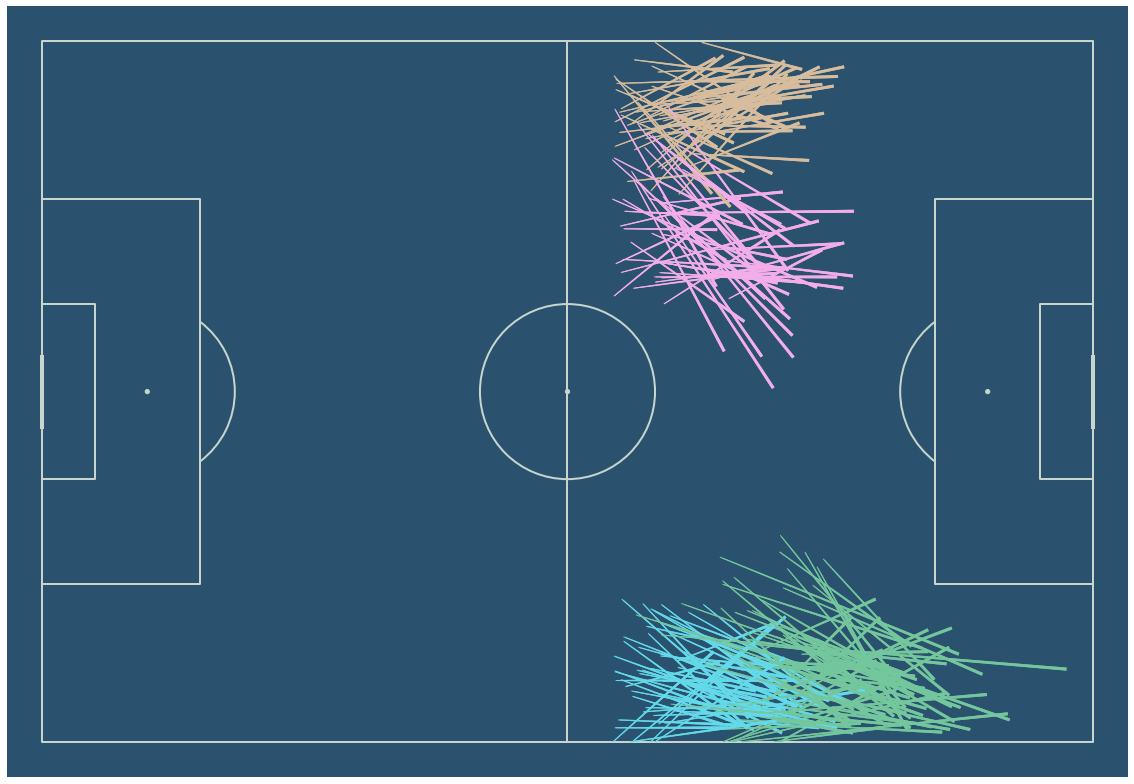

In [221]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Leeds Pass in 5-0 loss

In [222]:
sql = '''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE match_id = '3749453'
  AND team_name = 'Leeds United'
  AND pass_outcome_name is null
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,6ef71226-b218-4dee-bfb1-90d9846f4297,3749453,5,1,2021-09-14 00:00:00.096,0,0,2,0.864642,['e78a6141-76bc-4a90-8fa0-e1917e671528'],101,Leeds United,101,Leeds United,9,From Kick Off,40267,Alan Smith,24,Left Center Forward,61.0,40.1,Mark Viduka,40373.0,Kick Off,65.0,None,None,60.4,44.6,4.539824,1.703348,Ground Pass
1,1cf1247e-73f1-4136-b896-efb439bac75f,3749453,8,1,2021-09-14 00:00:02.734,0,2,2,1.748827,['1c5d90af-ba05-4310-937c-eeab3f9cedc1'],101,Leeds United,101,Leeds United,9,From Kick Off,40373,Mark Viduka,22,Right Center Forward,56.4,46.8,Jermaine Pennant,26649.0,None,NaN,None,None,43.2,75.5,31.590030,2.001877,Ground Pass
2,6db669df-5112-4f9e-ba97-99c608f7f7eb,3749453,30,1,2021-09-14 00:00:26.536,0,26,4,0.230230,['e8b8c77e-fa43-4c6d-8e56-9efb4dc07145'],101,Leeds United,101,Leeds United,1,Regular Play,40370,Lucas Radebe,3,Right Center Back,22.3,59.5,Michael Duberry,40371.0,Recovery,66.0,None,None,26.2,60.2,3.962322,0.177596,Ground Pass
3,81c03781-42c8-4a0a-a1b9-ee0aecfa6617,3749453,33,1,2021-09-14 00:00:29.528,0,29,4,1.340768,['cf89856b-2812-4a41-b3f9-c9d37cd27dbc'],101,Leeds United,101,Leeds United,1,Regular Play,40371,Michael Duberry,13,Right Center Midfield,30.0,60.8,Jermaine Pennant,26649.0,None,NaN,None,None,36.2,75.9,16.323296,1.181189,Ground Pass
4,c752c5cf-a07a-4bcc-bb90-14fe6124129c,3749453,37,1,2021-09-14 00:00:33.213,0,33,4,1.037702,"['ca7c9f47-e944-4da8-af20-870689cc59ad', 'dd33...",101,Leeds United,101,Leeds United,1,Regular Play,26649,Jermaine Pennant,12,Right Midfield,36.2,62.4,Lucas Radebe,40370.0,None,NaN,None,None,35.7,51.0,11.410959,-1.614628,Ground Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,f428b523-0701-4e3e-bc73-0a16ea64faa7,3749453,3489,2,2021-09-14 00:45:17.858,90,17,194,1.847749,['7b94c1a0-66f6-4642-905a-f99afaa27429'],101,Leeds United,101,Leeds United,1,Regular Play,39847,Dominic Matteo,15,Left Center Midfield,75.7,25.7,Gary Oliver Kelly,40270.0,None,NaN,None,None,70.9,68.3,42.869568,1.682999,High Pass
324,a86ecc59-2d37-46fd-8248-6822a6656195,3749453,3492,2,2021-09-14 00:45:24.804,90,24,194,0.982478,['ce94c21f-8626-43aa-9c1d-fe6830b69751'],101,Leeds United,101,Leeds United,1,Regular Play,40270,Gary Oliver Kelly,2,Right Back,63.4,64.9,Jermaine Pennant,26649.0,None,NaN,None,None,65.0,54.0,11.016806,-1.425048,Ground Pass
325,1ae45d92-5ac6-4162-b48b-f484801ac768,3749453,3495,2,2021-09-14 00:45:26.312,90,26,194,0.992425,['65382438-5a28-4ddf-b818-cbf7ad3a84f8'],101,Leeds United,101,Leeds United,1,Regular Play,26649,Jermaine Pennant,12,Right Midfield,65.2,54.0,Dominic Matteo,39847.0,None,NaN,None,None,73.6,41.6,14.977316,-0.975386,Ground Pass
326,569c3556-84d6-48c7-beac-4ec3efd37813,3749453,3498,2,2021-09-14 00:45:28.313,90,28,194,0.821218,['27c0183d-b271-4656-a5b5-02d19324816f'],101,Leeds United,101,Leeds United,1,Regular Play,39847,Dominic Matteo,15,Left Center Midfield,71.8,41.9,Jermaine Pennant,26649.0,None,NaN,None,None,67.0,55.1,14.045640,1.919567,Ground Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [223]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 20,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [224]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,6ef71226-b218-4dee-bfb1-90d9846f4297,3749453,5,1,2021-09-14 00:00:00.096,0,0,2,0.864642,['e78a6141-76bc-4a90-8fa0-e1917e671528'],101,Leeds United,101,Leeds United,9,From Kick Off,40267,Alan Smith,24,Left Center Forward,61.0,40.1,Mark Viduka,40373.0,Kick Off,65.0,None,None,60.4,44.6,4.539824,1.703348,Ground Pass,4
1,1cf1247e-73f1-4136-b896-efb439bac75f,3749453,8,1,2021-09-14 00:00:02.734,0,2,2,1.748827,['1c5d90af-ba05-4310-937c-eeab3f9cedc1'],101,Leeds United,101,Leeds United,9,From Kick Off,40373,Mark Viduka,22,Right Center Forward,56.4,46.8,Jermaine Pennant,26649.0,None,NaN,None,None,43.2,75.5,31.590030,2.001877,Ground Pass,11
2,6db669df-5112-4f9e-ba97-99c608f7f7eb,3749453,30,1,2021-09-14 00:00:26.536,0,26,4,0.230230,['e8b8c77e-fa43-4c6d-8e56-9efb4dc07145'],101,Leeds United,101,Leeds United,1,Regular Play,40370,Lucas Radebe,3,Right Center Back,22.3,59.5,Michael Duberry,40371.0,Recovery,66.0,None,None,26.2,60.2,3.962322,0.177596,Ground Pass,2
3,81c03781-42c8-4a0a-a1b9-ee0aecfa6617,3749453,33,1,2021-09-14 00:00:29.528,0,29,4,1.340768,['cf89856b-2812-4a41-b3f9-c9d37cd27dbc'],101,Leeds United,101,Leeds United,1,Regular Play,40371,Michael Duberry,13,Right Center Midfield,30.0,60.8,Jermaine Pennant,26649.0,None,NaN,None,None,36.2,75.9,16.323296,1.181189,Ground Pass,2
4,c752c5cf-a07a-4bcc-bb90-14fe6124129c,3749453,37,1,2021-09-14 00:00:33.213,0,33,4,1.037702,"['ca7c9f47-e944-4da8-af20-870689cc59ad', 'dd33...",101,Leeds United,101,Leeds United,1,Regular Play,26649,Jermaine Pennant,12,Right Midfield,36.2,62.4,Lucas Radebe,40370.0,None,NaN,None,None,35.7,51.0,11.410959,-1.614628,Ground Pass,2


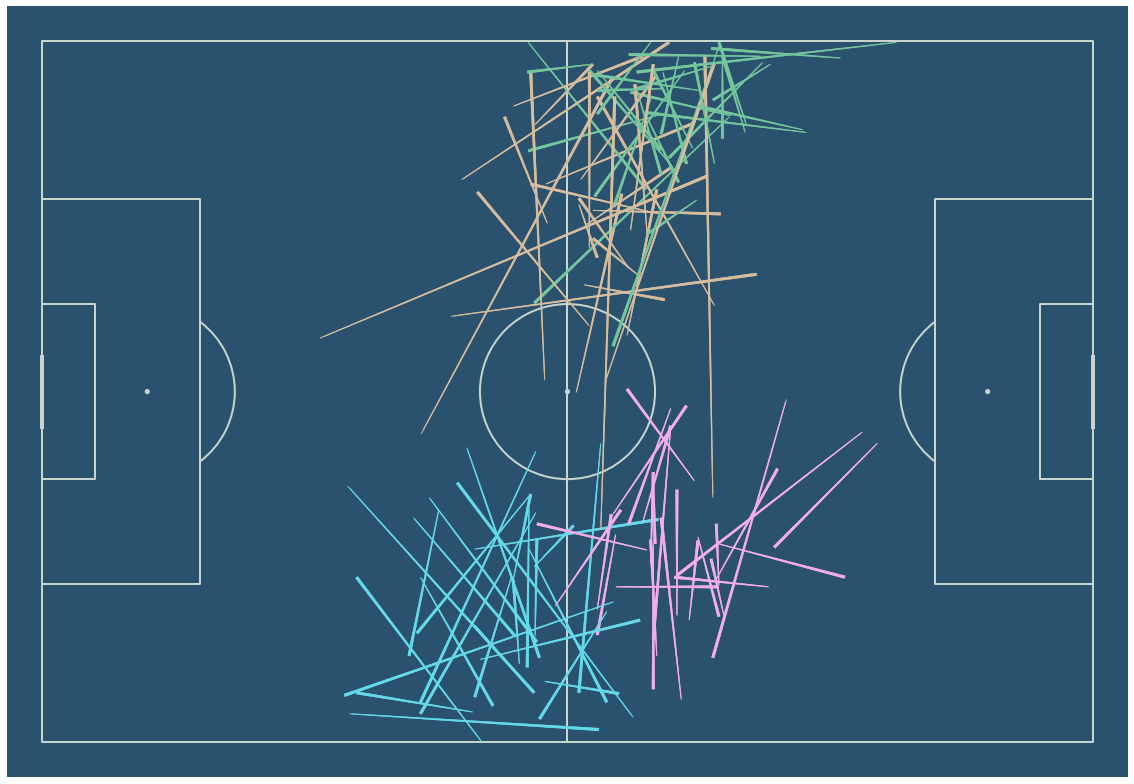

In [225]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 




# Clustering Arsenal Passes in 5-0 win against Leeds

In [226]:
sql = '''
SELECT *
FROM baseEvents b
LEFT JOIN possession_team USING(id)
LEFT JOIN team USING(id)
LEFT JOIN play_pattern USING(id)
LEFT JOIN player USING(id)
LEFT JOIN position USING(id)
LEFT JOIN location using(id)
JOIN passMain p USING(id)
WHERE match_id = '3749453'
  AND team_name = 'Arsenal'
  AND pass_outcome_name is null
'''

dfPassTemp = pd.read_sql_query(sql, con)
dfPassTemp

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height
0,b2e7c03e-ad1c-4b66-9a31-1bc5a0cb4203,3749453,14,1,2021-09-14 00:00:15.523,0,15,3,0.181381,['0bd52edd-c58f-4303-8190-4ea3ab720bfe'],1,Arsenal,1,Arsenal,1,Regular Play,20015,Jens Lehmann,1,Goalkeeper,9.0,32.7,Gaël Clichy,20302.0,None,NaN,None,None,25.6,20.8,20.424740,-0.621957,Low Pass
1,1c54f980-ca37-482a-8ffe-e3ae8a3002bf,3749453,17,1,2021-09-14 00:00:17.626,0,17,3,0.969489,['266c68de-62d1-4f74-9469-9994bf83b93b'],1,Arsenal,1,Arsenal,1,Regular Play,20302,Gaël Clichy,6,Left Back,26.7,8.2,Patrick Vieira,15515.0,None,NaN,None,None,38.8,13.1,13.054502,0.384774,Ground Pass
2,309dc464-fedd-4536-9bfe-ea060e78b831,3749453,20,1,2021-09-14 00:00:18.829,0,18,3,1.531253,['29c16035-a755-48e5-8b0a-d0f542c86d13'],1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,9,Right Defensive Midfield,38.8,13.1,Gaël Clichy,20302.0,None,NaN,None,None,43.7,2.9,11.315918,-1.122958,Ground Pass
3,99cb6667-d9a0-45a0-b68b-d6536d658e5d,3749453,23,1,2021-09-14 00:00:21.905,0,21,3,0.808234,['22a40ff6-9cd1-4d48-82bc-b599646d67c3'],1,Arsenal,1,Arsenal,1,Regular Play,20302,Gaël Clichy,6,Left Back,63.1,4.6,Thierry Henry,15516.0,None,NaN,None,None,80.7,10.6,18.594624,0.328553,Low Pass
4,7f406a5d-880f-42cb-9d5f-3fcc1fc75936,3749453,55,1,2021-09-14 00:00:45.182,0,45,5,1.144121,['37440303-2f9d-4feb-a38d-6f8d0921a243'],1,Arsenal,1,Arsenal,1,Regular Play,19312,Robert Pirès,16,Left Midfield,70.3,3.5,Dennis Bergkamp,15042.0,None,NaN,None,None,83.9,2.7,13.623509,-0.058756,Low Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,11fb5ac6-5c7d-49ad-bd85-572e4daf6487,3749453,3507,2,2021-09-14 00:45:45.420,90,45,195,1.131154,['7cbaa285-2f5e-4863-b1e3-c0b9920aa918'],1,Arsenal,1,Arsenal,4,From Throw In,20302,Gaël Clichy,6,Left Back,31.2,0.1,Eduardo César Daude Gaspar,26014.0,Throw-in,67.0,None,None,33.0,15.6,15.604166,1.455185,Low Pass
416,f7dd5d20-7f0a-40b9-b1d6-2846abb5fa67,3749453,3510,2,2021-09-14 00:45:47.985,90,47,195,1.097412,['eaa52055-40ea-4f6e-be52-b80202821d7e'],1,Arsenal,1,Arsenal,4,From Throw In,26014,Eduardo César Daude Gaspar,11,Left Defensive Midfield,32.1,16.3,Gaël Clichy,20302.0,None,NaN,None,None,28.4,4.2,12.653063,-1.867552,Ground Pass
417,e1bb202a-553d-43af-ac9b-572b2260ee74,3749453,3513,2,2021-09-14 00:45:49.082,90,49,195,0.730736,['77a735e6-c77e-4a5d-af81-0e0deb703438'],1,Arsenal,1,Arsenal,4,From Throw In,20302,Gaël Clichy,6,Left Back,29.3,5.6,Eduardo César Daude Gaspar,26014.0,None,NaN,None,None,32.8,18.6,13.462912,1.307802,Low Pass
418,d3167dfe-6ea3-41b7-954c-807bcf524d07,3749453,3516,2,2021-09-14 00:45:54.198,90,54,195,1.456589,['970d8300-72eb-4353-9848-9cad9f75dd93'],1,Arsenal,1,Arsenal,4,From Throw In,26014,Eduardo César Daude Gaspar,11,Left Defensive Midfield,43.7,23.0,Thierry Henry,15516.0,None,NaN,None,None,60.4,43.0,26.055517,0.875075,Ground Pass


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [227]:
X = np.array(dfPassTemp[['x','y','x_end_location','y_end_location']])
kmeans = KMeans(n_clusters = 20,random_state=100)
kmeans.fit(X)
dfPassTemp['cluster'] = kmeans.predict(X)

In [228]:
dfPassTemp.head()

,id,match_id,index_,period,timestamp,minute,second,possession,duration,related_events,possesion_team_id,possesion_team_name,team_id,team_name,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,x,y,recipient_name,recipient_id,pass_type_name,pass_type_id,pass_outcome_name,pass_outcome_id,x_end_location,y_end_location,length,angle,height,cluster
0,b2e7c03e-ad1c-4b66-9a31-1bc5a0cb4203,3749453,14,1,2021-09-14 00:00:15.523,0,15,3,0.181381,['0bd52edd-c58f-4303-8190-4ea3ab720bfe'],1,Arsenal,1,Arsenal,1,Regular Play,20015,Jens Lehmann,1,Goalkeeper,9.0,32.7,Gaël Clichy,20302.0,None,NaN,None,None,25.6,20.8,20.424740,-0.621957,Low Pass,5
1,1c54f980-ca37-482a-8ffe-e3ae8a3002bf,3749453,17,1,2021-09-14 00:00:17.626,0,17,3,0.969489,['266c68de-62d1-4f74-9469-9994bf83b93b'],1,Arsenal,1,Arsenal,1,Regular Play,20302,Gaël Clichy,6,Left Back,26.7,8.2,Patrick Vieira,15515.0,None,NaN,None,None,38.8,13.1,13.054502,0.384774,Ground Pass,5
2,309dc464-fedd-4536-9bfe-ea060e78b831,3749453,20,1,2021-09-14 00:00:18.829,0,18,3,1.531253,['29c16035-a755-48e5-8b0a-d0f542c86d13'],1,Arsenal,1,Arsenal,1,Regular Play,15515,Patrick Vieira,9,Right Defensive Midfield,38.8,13.1,Gaël Clichy,20302.0,None,NaN,None,None,43.7,2.9,11.315918,-1.122958,Ground Pass,16
3,99cb6667-d9a0-45a0-b68b-d6536d658e5d,3749453,23,1,2021-09-14 00:00:21.905,0,21,3,0.808234,['22a40ff6-9cd1-4d48-82bc-b599646d67c3'],1,Arsenal,1,Arsenal,1,Regular Play,20302,Gaël Clichy,6,Left Back,63.1,4.6,Thierry Henry,15516.0,None,NaN,None,None,80.7,10.6,18.594624,0.328553,Low Pass,6
4,7f406a5d-880f-42cb-9d5f-3fcc1fc75936,3749453,55,1,2021-09-14 00:00:45.182,0,45,5,1.144121,['37440303-2f9d-4feb-a38d-6f8d0921a243'],1,Arsenal,1,Arsenal,1,Regular Play,19312,Robert Pirès,16,Left Midfield,70.3,3.5,Dennis Bergkamp,15042.0,None,NaN,None,None,83.9,2.7,13.623509,-0.058756,Low Pass,6


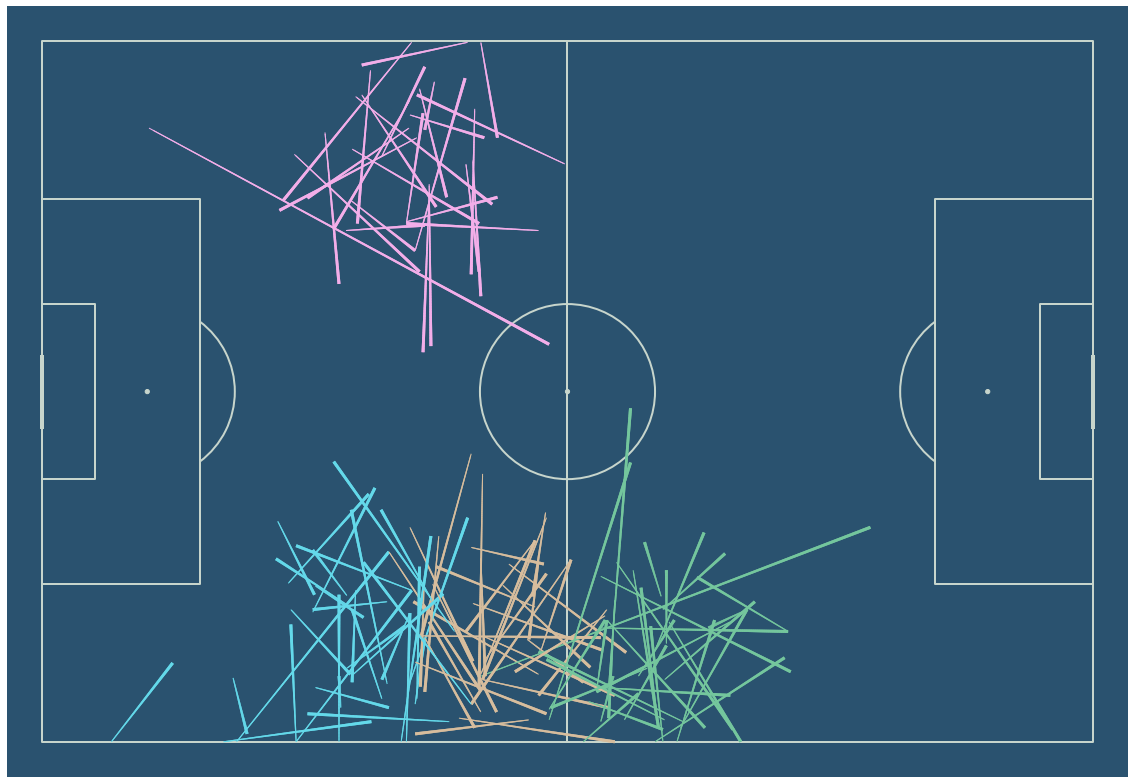

In [229]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#2A526F', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11))



topClusters = dfPassTemp.cluster.value_counts().rename_axis('cluster_number').reset_index(name='count')
top3 = topClusters.iloc[0:4,0].tolist()


for i in range(len(dfPassTemp['id'])):

    if dfPassTemp['cluster'][i] == top3[0]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],
                    xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
    
    if dfPassTemp['cluster'][i] == top3[1]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#D7BD9D',lw=3,zorder=2,comet=True,ax=ax)

    if dfPassTemp['cluster'][i] == top3[2]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#64D9EA',lw=3,zorder=2,comet=True,ax=ax)  

    if dfPassTemp['cluster'][i] == top3[3]:
        pitch.lines(xstart=dfPassTemp['x'][i],ystart=dfPassTemp['y'][i],xend=dfPassTemp['x_end_location'][i],yend=dfPassTemp['y_end_location'][i],
                   color='#F3AEE9',lw=3,zorder=2,comet=True,ax=ax) 

